# Homework 05 - Taming text

## Exercise 1 - Generating word clouds

### Step one - Using the raw corpus

In this part we will use the raw email contents with minimal pre-processing to generate a word cloud using the [word_cloud](https://github.com/amueller/word_cloud) library.

In [48]:
# Imports
import numpy as np
import pandas as pd
from wordcloud import WordCloud as wc
import matplotlib.pyplot as plt
%matplotlib inline

First we load the email data, try to understand it's structure and choose which fields to use.

In [4]:
raw_emails = pd.read_csv('hillary-clinton-emails/Emails.csv')
raw_emails.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


It seems that the `ExtractedBodyText` field is what we would like to work with. However there are some missing values. Let's see if there are many of them.

In [22]:
print('Number of emails with null ExtractedBodyText:', raw_emails['ExtractedBodyText'].isnull().sum())
print('Total number of emails:', len(raw_emails))

Number of emails with null ExtractedBodyText: 1203
Total number of emails: 7945


So we will not use this field. We will instead use `RawText` and do some minimal preprocessing on it to remove irrelevant parts.

In [44]:
def preprocess_raw_email(text):
    """Very simple email preprocessing: we remove all uppercase words
    which are mostly used as metadata, as well as From:, To: and other
    mail protocol keywords."""
    
    keywords = ('U.S. Department of State', 'Department of State', 'Case No.', 'Doc No.',
                'STATE DEPT.',
                'From:', 'To:', 'Sent:', 'Subject:', 'Attachments:',
                'Date:')
    
    # Remove lines starting with keyword
    lines = text.split('\n')
    lines = [ l for l in lines if not l.startswith(keywords) ]
    
    words = ' '.join(lines).split()
    words = [ w for w in words if not w.isupper() ]
    
    return words

In [47]:
raw_text = raw_emails['RawText']
mapped_words = raw_text.map(preprocess_raw_email)
# Flatten the array of arrays of words
words = [ w for sublist in mapped_words for w in sublist ]

(-0.5, 399.5, 199.5, -0.5)

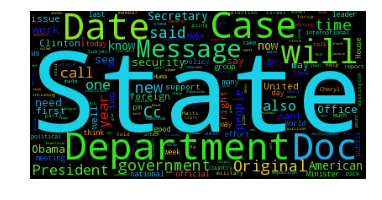

In [52]:
text = ' '.join(words)
wordCloud = wc().generate(text)
plt.imshow(wordCloud)
plt.axis("off")